In [106]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from constants import PROJECT_DIR, PLOT_DIR

In [127]:
def createPlotStyle(title, xlabel, ylabel, upperBoundYTicks, stepSize):
    plt.title(title, fontsize=25,fontweight='bold')
    plt.ylabel(ylabel,fontsize=15,fontweight='bold')
    plt.yticks(np.arange(0,upperBoundYTicks,stepSize))
    plt.xlabel(xlabel,fontsize=15,fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)

# Loading Data into Pandas frame

In [4]:
path = os.path.join(PROJECT_DIR,"data", "student_data_per_subject.xlsx")
sheet = "Sheet1"

studentsDataAllSubjects = pd.read_excel(path,sheet_name=sheet, header=[0,2], index_col=[0,1,2])
studentsDataAllSubjects.fillna(0, inplace=True)

studentsDataAllSubjects.index.names = ["", "subject", "degree"]
studentsDataAllSubjects

WiSe 2005/2006  \
Subject                                                                    0   
    subject                                            degree                  
0   "Englische Sprache und Literatur des Mittelalters" HF                  0   
1   "Englische Sprache und Literatur des Mittelalters" NF                  0   
2   "Klassische Archäologie"                           HF                  0   
3   "Klassische Archäologie"                           NF                  0   
4   "Latein"                                           HF                  0   
...                                                                      ...   
623 "Computational Neuroscience"                       NF                  0   
624 "Infection Biology and Control"                    HF                  0   
625 "Infection Biology and Control"                    NF                  0   
626 "Neural and Behavioural Sciences"                  HF                  0   
627 "Neural and Behavioural Sciences"                  NF                  0   

                                                                             \
Subject                                                         1  2   3  4   
    subject                                            degree                 
0   "Englische Sprache und Literatur des Mittelalters" HF       4  0   1  1   
1   "Englische Sprache und Literatur des Mittelalters" NF       6  1   0  0   
2   "Klassische Archäologie"                           HF      32  6   7  3   
3   "Klassische Archäologie"                           NF      12  4   5  7   
4   "Latein"                                           HF      28  8  22  4   
...                                                            .. ..  .. ..   
623 "Computational Neuroscience"                       NF       0  0   0  0   
624 "Infection Biology and Control"                    HF       0  0   0  0   
625 "Infection Biology and Control"                    NF       0  0   0  0   
626 "Neural and Behavioural Sciences"                  HF       0  0   0  0   
627 "Neural and Behavioural Sciences"                  NF       0  0   0  0   

                                                                               \
Subject                                                         5  6  7  8  9   
    subject                                            degree                   
0   "Englische Sprache und Literatur des Mittelalters" HF       0  0  1  0  0   
1   "Englische Sprache und Literatur des Mittelalters" NF       1  1  1  0  2   
2   "Klassische Archäologie"                           HF      11  6  4  1  5   
3   "Klassische Archäologie"                           NF      10  3  3  2  5   
4   "Latein"                                           HF       8  5  7  3  3   
...                                                            .. .. .. .. ..   
623 "Computational Neuroscience"                       NF       0  0  0  0  0   
624 "Infection Biology and Control"                    HF       0  0  0  0  0   
625 "Infection Biology and Control"                    NF       0  0  0  0  0   
626 "Neural and Behavioural Sciences"                  HF       0  0  0  0  0   
627 "Neural and Behavioural Sciences"                  NF       0  0  0  0  0   

                                                               ...  \
Subject                                                        ...   
    subject                                            degree  ...   
0   "Englische Sprache und Literatur des Mittelalters" HF      ...   
1   "Englische Sprache und Literatur des Mittelalters" NF      ...   
2   "Klassische Archäologie"                           HF      ...   
3   "Klassische Archäologie"                           NF      ...   
4   "Latein"                                           HF      ...   
...                                                            ...   
623 "Computational Neuroscience"                       NF      ...   

In [5]:
allStudentsPerSemesterAndYear = studentsDataAllSubjects.sum(numeric_only=True)
allStudentsPerSemesterAndYear

                Subject
WiSe 2005/2006  0             0
                1          8028
                2          1941
                3          5151
                4          1911
                           ... 
WiSe 2023/2024  9          2402
                10          680
                11         1361
                12          449
                >12        2756
Length: 518, dtype: int64

In [6]:
allStudentsPerSubject = studentsDataAllSubjects.sum(numeric_only=True, axis=1)
allStudentsPerSubject

     subject                                             degree
0    "Englische Sprache und Literatur des Mittelalters"  HF          87
1    "Englische Sprache und Literatur des Mittelalters"  NF          78
2    "Klassische Archäologie"                            HF        3116
3    "Klassische Archäologie"                            NF        2406
4    "Latein"                                            HF        8648
                                                                   ... 
623  "Computational Neuroscience"                        NF           0
624  "Infection Biology and Control"                     HF          15
625  "Infection Biology and Control"                     NF           0
626  "Neural and Behavioural Sciences"                   HF          16
627  "Neural and Behavioural Sciences"                   NF           0
Length: 628, dtype: int64

# First data exploration
To get a better understanding of the dataset we are going to do some simple analysis, which contains of the following plots

- line chart
- boxplot
- heatmap

With these basic plots we want to search for correlations in the data

/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_18820/1494056899.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])


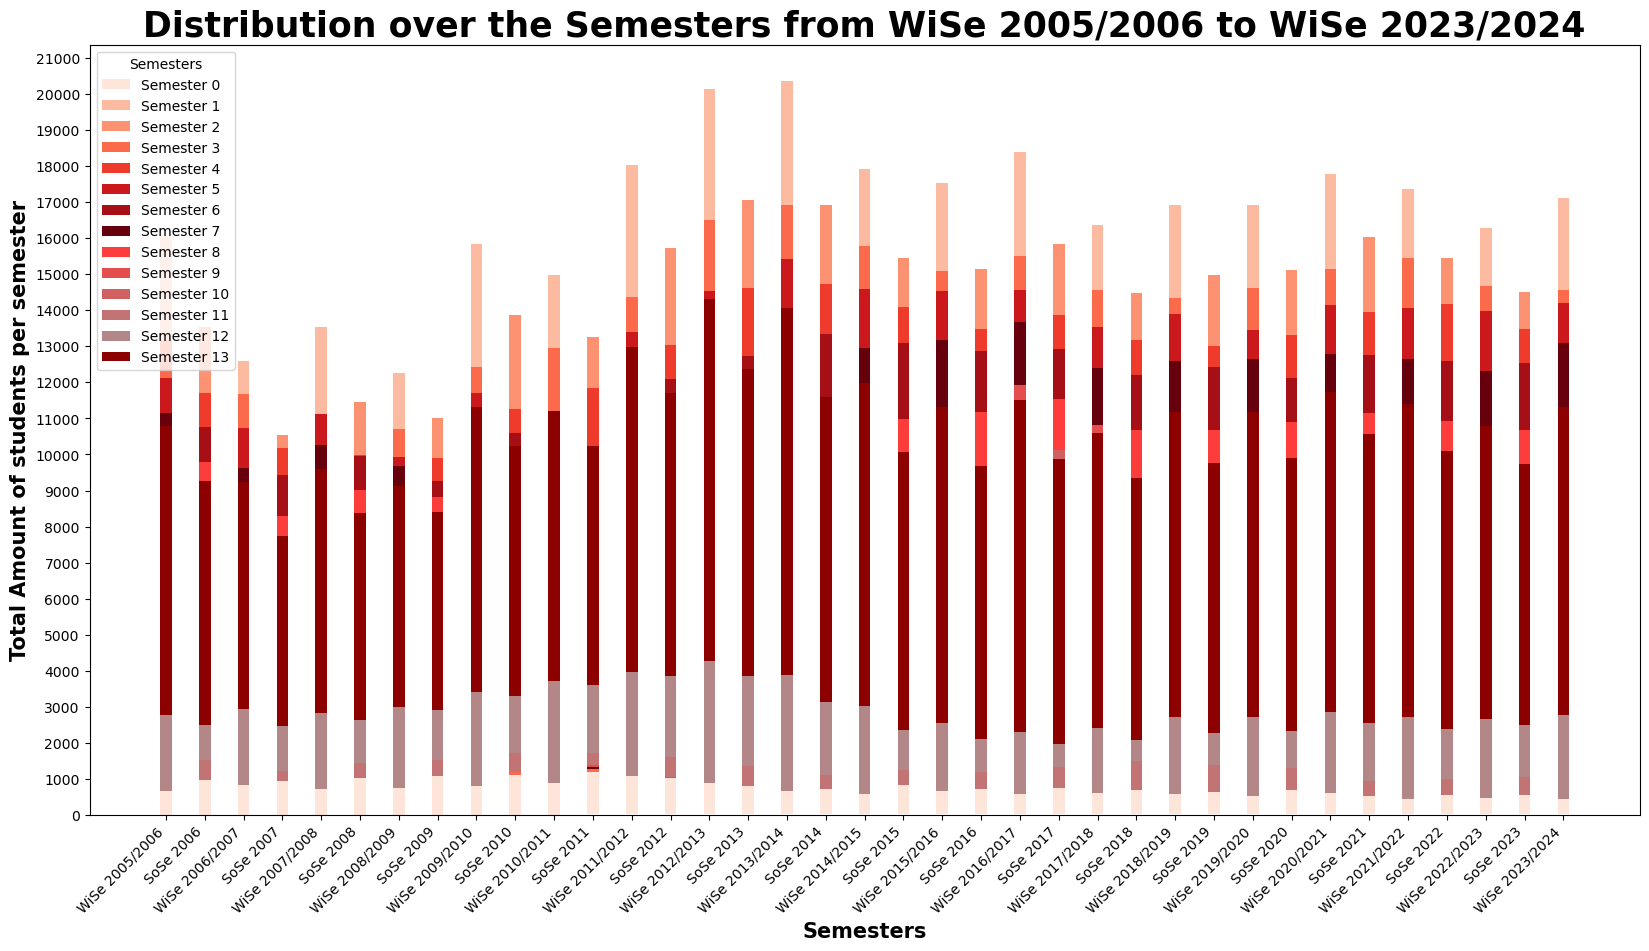

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
years = studentsDataAllSubjects.columns.get_level_values(0).unique()
semester = studentsDataAllSubjects.columns.get_level_values(1).unique()


allStudentsPerSemesterAndYear.groupby(level=0)
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a9850', '#d73027', '#4575b4']
colors = [
    "#fee5d9",
    "#fcbba1",
    "#fc9272",
    "#fb6a4a",
    "#ef3b2c",
    "#cb181d",
    "#a50f15",
    "#67000d",
    "#fd3c3c",
    "#e54e4e",
    "#d16060",
    "#c27474",
    "#b38787",
    "#8c0000"
]

   
def createBarPlot(years,dataset,ax):
    for year in years:
        data = dataset[year]
        for idx in range(0,len(data)):
            ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])
        



def legendWithoutDuplicateLabels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), title="Semesters")

createPlotStyle("Distribution over the Semesters from WiSe 2005/2006 to WiSe 2023/2024","Semesters", "Total Amount of students per semester",24000,1000)

createBarPlot(years,allStudentsPerSemesterAndYear, ax)

legendWithoutDuplicateLabels(ax)

fig.savefig(os.path.join(PLOT_DIR, "stacked_bar_chart_all_subjects.jpg"))

## Analysis of the stacked bar chart
As you can see, there are two different slopes in the data which can be explained by the difference of students starting in the summer semester than in the winter semester. This could have several reasons like the a levels take place in summer, so the students want to start at the next possible state.


/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_18820/96921086.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])


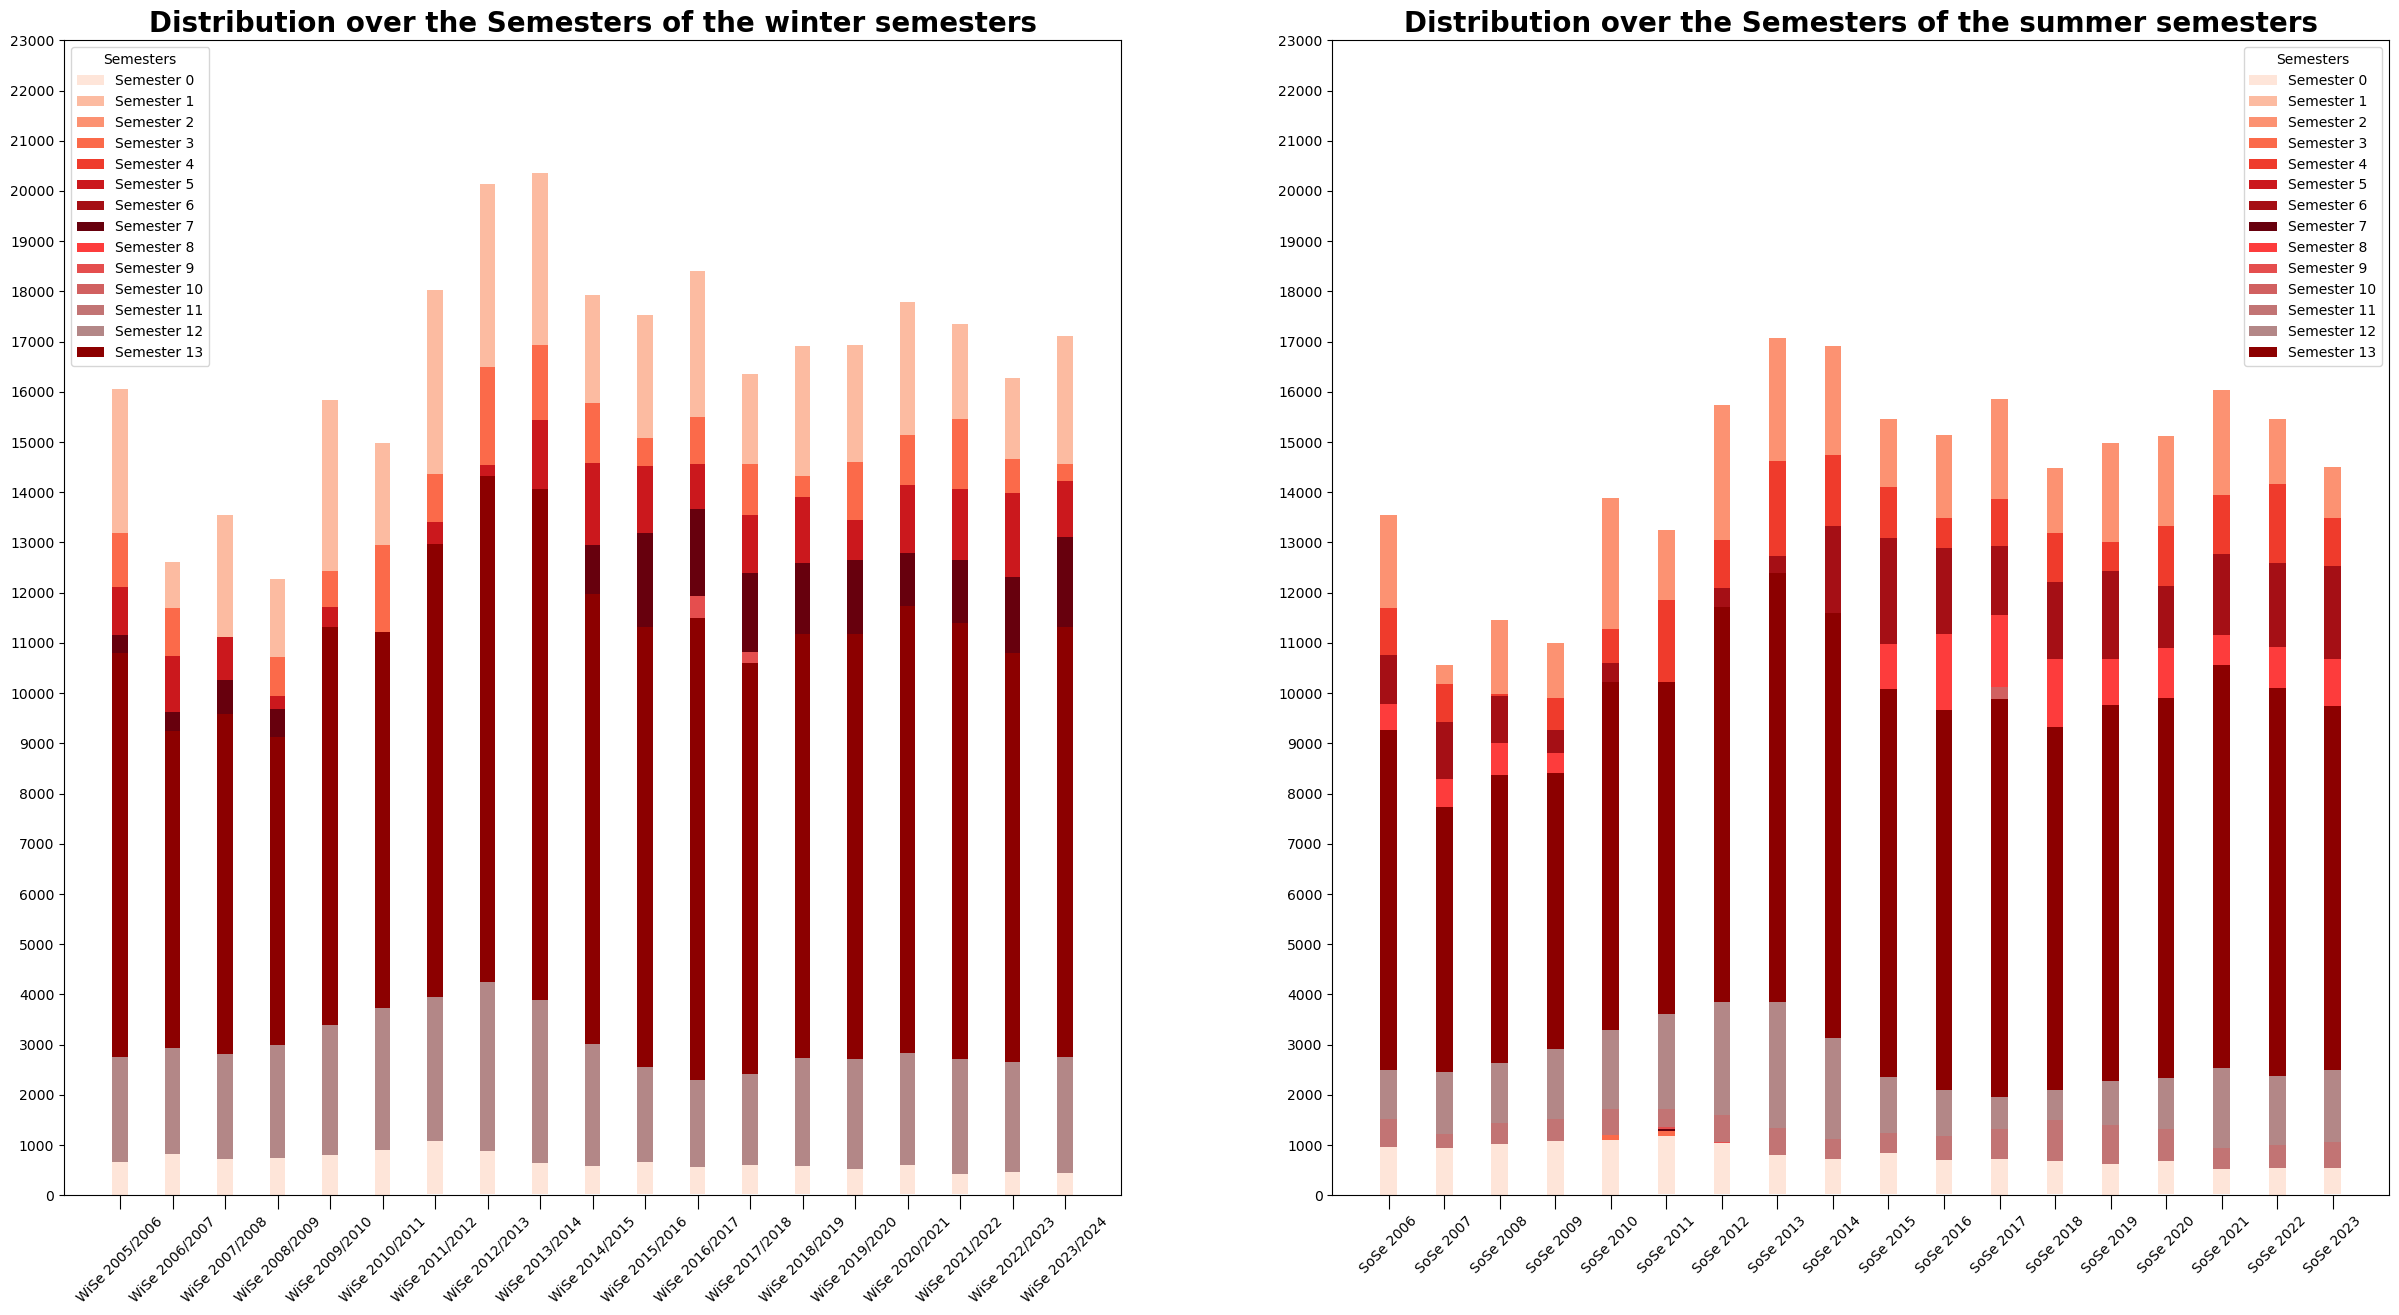

In [8]:
winterSemesterPattern = re.compile(r"WiSe.*")
summerSemesterPattern = re.compile(r"SoSe.*")

summerSemester = [summerData for summerData in years if re.match(summerSemesterPattern, summerData)]
winterSemester = [winterData for winterData in years if re.match(winterSemesterPattern, winterData)]
       

fig, ax = plt.subplots(1,2,figsize=(30,15))

createBarPlot(winterSemester,allStudentsPerSemesterAndYear,ax[0])
createBarPlot(summerSemester,allStudentsPerSemesterAndYear,ax[1])
legendWithoutDuplicateLabels(ax[0])
legendWithoutDuplicateLabels(ax[1])

ax[0].set_title("Distribution over the Semesters of the winter semesters", size=20, fontweight='bold')
ax[0].tick_params(axis='x',rotation=45, right='right', size=10)
ax[0].set_yticks(np.arange(0,24000,1000));
ax[1].set_title("Distribution over the Semesters of the summer semesters", size=20,fontweight='bold')
ax[1].tick_params(axis='x',rotation=45, right='right', size=10)
ax[1].set_yticks(np.arange(0,24000,1000));

fig.savefig(os.path.join(PLOT_DIR, "splitted_summer_winter_bar.jpg"))


## Feature Analysis of specific STEM subjects of the university


In [9]:
allStemSubjects = [
'""Sciences""',
 '""Vorbereitung Promotion Mathematisch-Naturwissenschaftliche Fakultät""',
 '""Vorübergehender Forschungsaufenthalt Mathematisch-Naturwissenschaftliche Fakultät""',
 '""Psychologie""',
 '""Naturwissenschaftliche Archäologie""',
 '""Archaeological Sciences and Human Evolution""',
 '"Palaeolithic Archaeology"',
 '"Kognitionswissenschaft"',
 '"Psychologie - polyvalent"',
 '"Schulpsychologie"',
 '"Machine Learning"',
 '"Informatik Kurzzeitstudiengang"',
 '"Medizininformatik"',
 '"Informatik / Computer Science"',
 '"Medieninformatik / Media Informatics"',
 '"Biochemie"',
 '"Biologie"',
 '"Chemie"',
 '"Geowissenschaften"',
 '"Geographie"',
 '"Geologie"',
 '"Mathematik"',
 '"Mineralogie"',
 '"Pharmazie"',
 '"Physik"',
 '"Geoökologie/Ökosystemmanagement"',
 '"Geoökologie"',
 '"Geoökologie / Geoecology"',
 '"Nano-Science"',
 '"Advanced Quantum Physics"',
 '"Evolution und Ökologie"',
 '"Molekulare Zellbiologie und Immunologie"',
 '"Mikrobiologie"',
 '"Zelluläre und Molekulare Biologie der Pflanzen"',
 '"Neurobiologie"',
 '"Biochemistry"',
 '"Pharmaceutical Sciences and Technologies"',
 '"Physik Quereinstieg Erstes Fach"',
 '"Physik Quereinstieg Zweites Fach"',
 '"Umweltnaturwissenschaften"',
 '"Applied Environmental Geoscience (AEG)"',
 '"Paläoanthropologie"',
 '"Naturwissenschaft und Technik"',
 '"Astronomie"',
 '"Physische Geographie / Landscape System Sciences"',
 '"Physische Geographie - Umweltgeographie"',
 '"Physische Geographie"',
 '"Humangeographie / Global Studies"',
 '"Applied & Environmental Geoscience (AEG)"',
 '"Geowissenschaften / Geosciences"',
 '"European Studies (MEUS)"',
 '"Psychologie mit Schwerpunkt Klinische Psychologie und Psychotherapie"',
 '"Informatik"',
 '"Mathematical Physics"',
 '"Astro and Particle Physics"',
 '"Informatik Quereinstieg Erstes Fach"',
 '"Mathematik Quereinstieg Erstes Fach"',
 '"Informatik Quereinstieg Zweites Fach"',
 '"Mathematik Quereinstieg Zweites Fach"',
 '"Bioinformatik"',
 '"Medizininformatik/Medical Informatics"',
 '"Bioinformatik/Bioinformatics"',
 '"Medieninformatik"']


allStemSubjects


['""Sciences""',
 '""Vorbereitung Promotion Mathematisch-Naturwissenschaftliche Fakultät""',
 '""Vorübergehender Forschungsaufenthalt Mathematisch-Naturwissenschaftliche Fakultät""',
 '""Psychologie""',
 '""Naturwissenschaftliche Archäologie""',
 '""Archaeological Sciences and Human Evolution""',
 '"Palaeolithic Archaeology"',
 '"Kognitionswissenschaft"',
 '"Psychologie - polyvalent"',
 '"Schulpsychologie"',
 '"Machine Learning"',
 '"Informatik Kurzzeitstudiengang"',
 '"Medizininformatik"',
 '"Informatik / Computer Science"',
 '"Medieninformatik / Media Informatics"',
 '"Biochemie"',
 '"Biologie"',
 '"Chemie"',
 '"Geowissenschaften"',
 '"Geographie"',
 '"Geologie"',
 '"Mathematik"',
 '"Mineralogie"',
 '"Pharmazie"',
 '"Physik"',
 '"Geoökologie/Ökosystemmanagement"',
 '"Geoökologie"',
 '"Geoökologie / Geoecology"',
 '"Nano-Science"',
 '"Advanced Quantum Physics"',
 '"Evolution und Ökologie"',
 '"Molekulare Zellbiologie und Immunologie"',
 '"Mikrobiologie"',
 '"Zelluläre und Molekulare B

In [29]:
subject_values = studentsDataAllSubjects.index.get_level_values('subject')

STEM_DATA_FRAME = studentsDataAllSubjects[studentsDataAllSubjects.index.get_level_values('subject').isin(allStemSubjects)]

STEM_DATA_FRAME

WiSe 2005/2006  \
Subject                                                                    0   
    subject                                            degree                  
22  "Mathematik"                                       HF                  0   
23  "Mathematik"                                       NF                  0   
48  "Mineralogie"                                      HF                  0   
49  "Mineralogie"                                      NF                  0   
54  "Informatik Kurzzeitstudiengang"                   HF                  0   
...                                                                      ...   
607 "Informatik Quereinstieg Erstes Fach"              NF                  0   
616 "Palaeolithic Archaeology"                         HF                  0   
617 "Palaeolithic Archaeology"                         NF                  0   
620 "Psychologie mit Schwerpunkt Klinische Psycholo... HF                  0   
621 "Psychologie mit Schwerpunkt Klinische Psycholo... NF                  0   

                                                                               \
Subject                                                          1  2    3  4   
    subject                                            degree                   
22  "Mathematik"                                       HF      176  9  112  9   
23  "Mathematik"                                       NF        8  1    0  1   
48  "Mineralogie"                                      HF        0  0    0  0   
49  "Mineralogie"                                      NF        0  0    0  0   
54  "Informatik Kurzzeitstudiengang"                   HF        1  0    1  0   
...                                                            ... ..  ... ..   
607 "Informatik Quereinstieg Erstes Fach"              NF        0  0    0  0   
616 "Palaeolithic Archaeology"                         HF        0  0    0  0   
617 "Palaeolithic Archaeology"                         NF        0  0    0  0   
620 "Psychologie mit Schwerpunkt Klinische Psycholo... HF        0  0    0  0   
621 "Psychologie mit Schwerpunkt Klinische Psycholo... NF        0  0    0  0   

                                                                              \
Subject                                                         5   6   7  8   
    subject                                            degree                  
22  "Mathematik"                                       HF      99  25  62  8   
23  "Mathematik"                                       NF       3   2   0  0   
48  "Mineralogie"                                      HF       0   0   0  0   
49  "Mineralogie"                                      NF       0   0   0  0   
54  "Informatik Kurzzeitstudiengang"                   HF       1   0   0  0   
...                                                            ..  ..  .. ..   
607 "Informatik Quereinstieg Erstes Fach"              NF       0   0   0  0   
616 "Palaeolithic Archaeology"                         HF       0   0   0  0   
617 "Palaeolithic Archaeology"                         NF       0   0   0  0   
620 "Psychologie mit Schwerpunkt Klinische Psycholo... HF       0   0   0  0   
621 "Psychologie mit Schwerpunkt Klinische Psycholo... NF       0   0   0  0   

                                                                   ...  \
Subject                                                         9  ...   
    subject                                            degree      ...   
22  "Mathematik"                                       HF      39  ...   
23  "Mathematik"                                       NF       1  ...   
48  "Mineralogie"                                      HF       2  ...   
49  "Mineralogie"                                      NF       0  ...   
54  "Informatik Kurzzeitstudiengang"                   HF       0  ...   
...                                                            ..  ...   
607 "Informatik Que

In [45]:
STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR = STEM_DATA_FRAME.sum()
STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR

                Subject
WiSe 2005/2006  0             0
                1          1498
                2           219
                3          1115
                4           211
                           ... 
WiSe 2023/2024  9           573
                10          123
                11          237
                12           54
                >12         360
Length: 518, dtype: int64

/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_18820/1494056899.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])


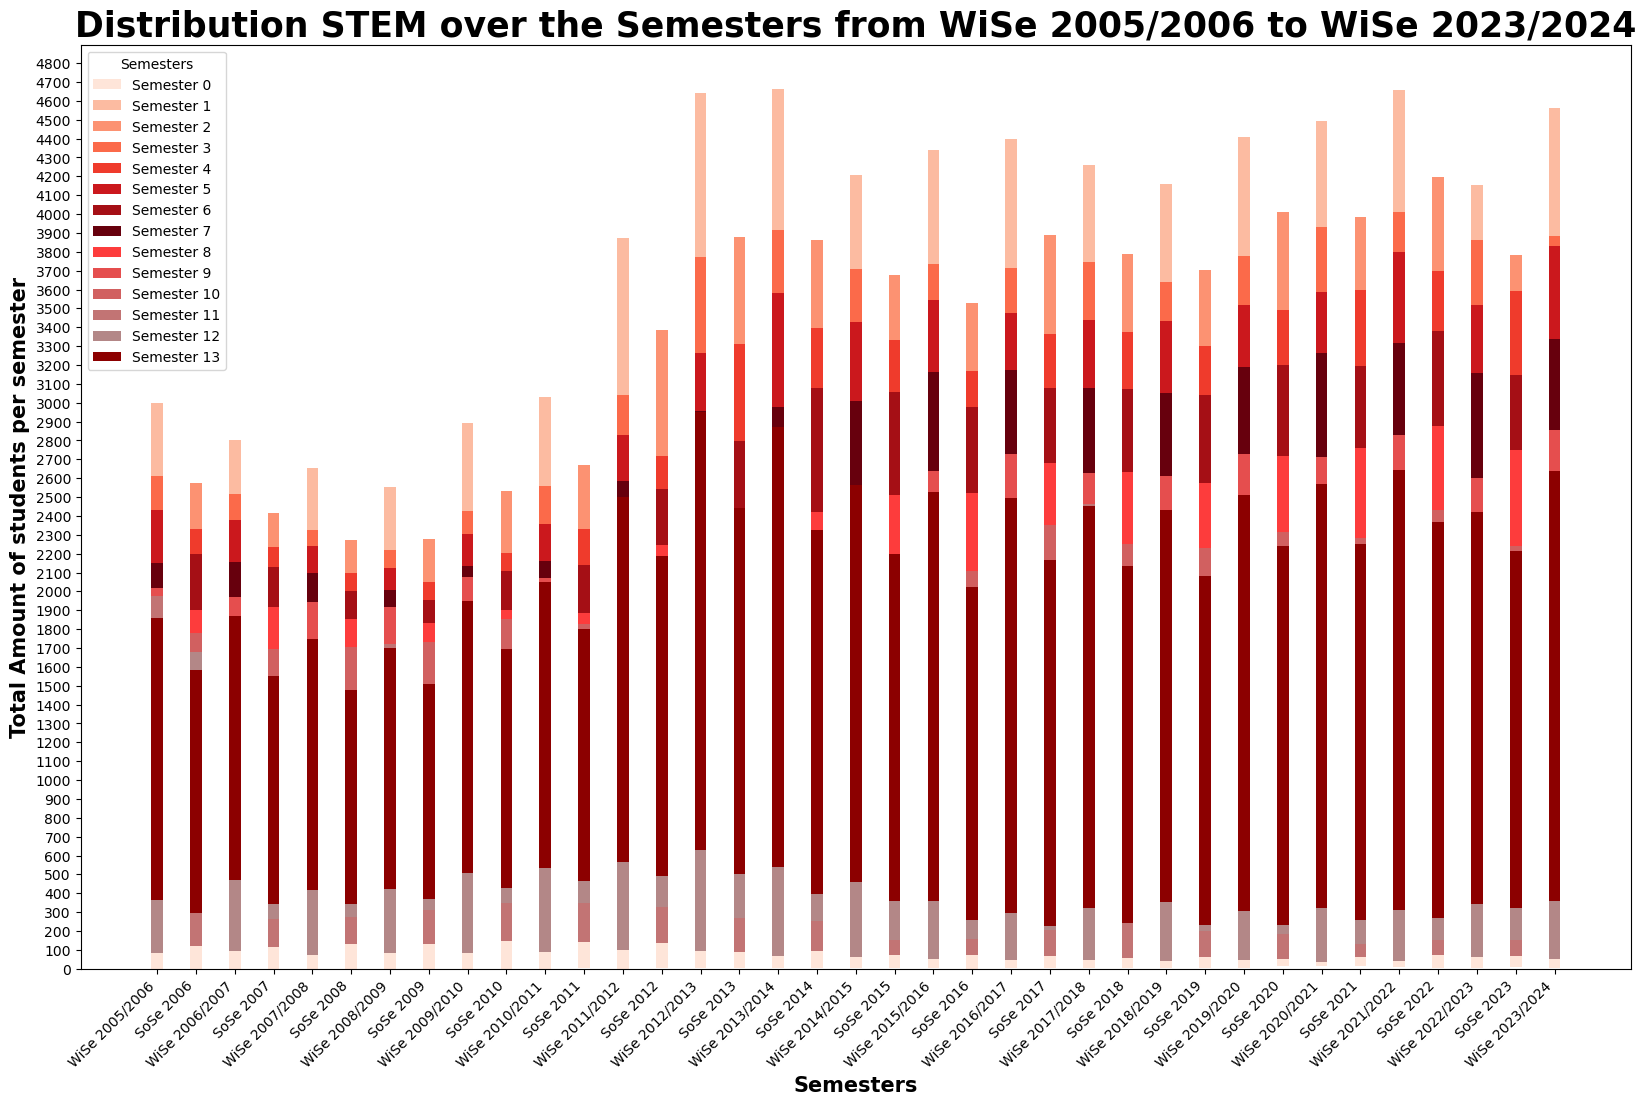

In [129]:
fig, ax = plt.subplots(figsize=(20,12))

createPlotStyle("Distribution STEM over the Semesters from WiSe 2005/2006 to WiSe 2023/2024","Semesters", "Total Amount of students per semester",5000,100)

createBarPlot(years, STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR, ax)

legendWithoutDuplicateLabels(ax)

fig.savefig(os.path.join(PLOT_DIR, "stacked_bar_chart_stem_subjects.jpg"))

/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_18820/96921086.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])


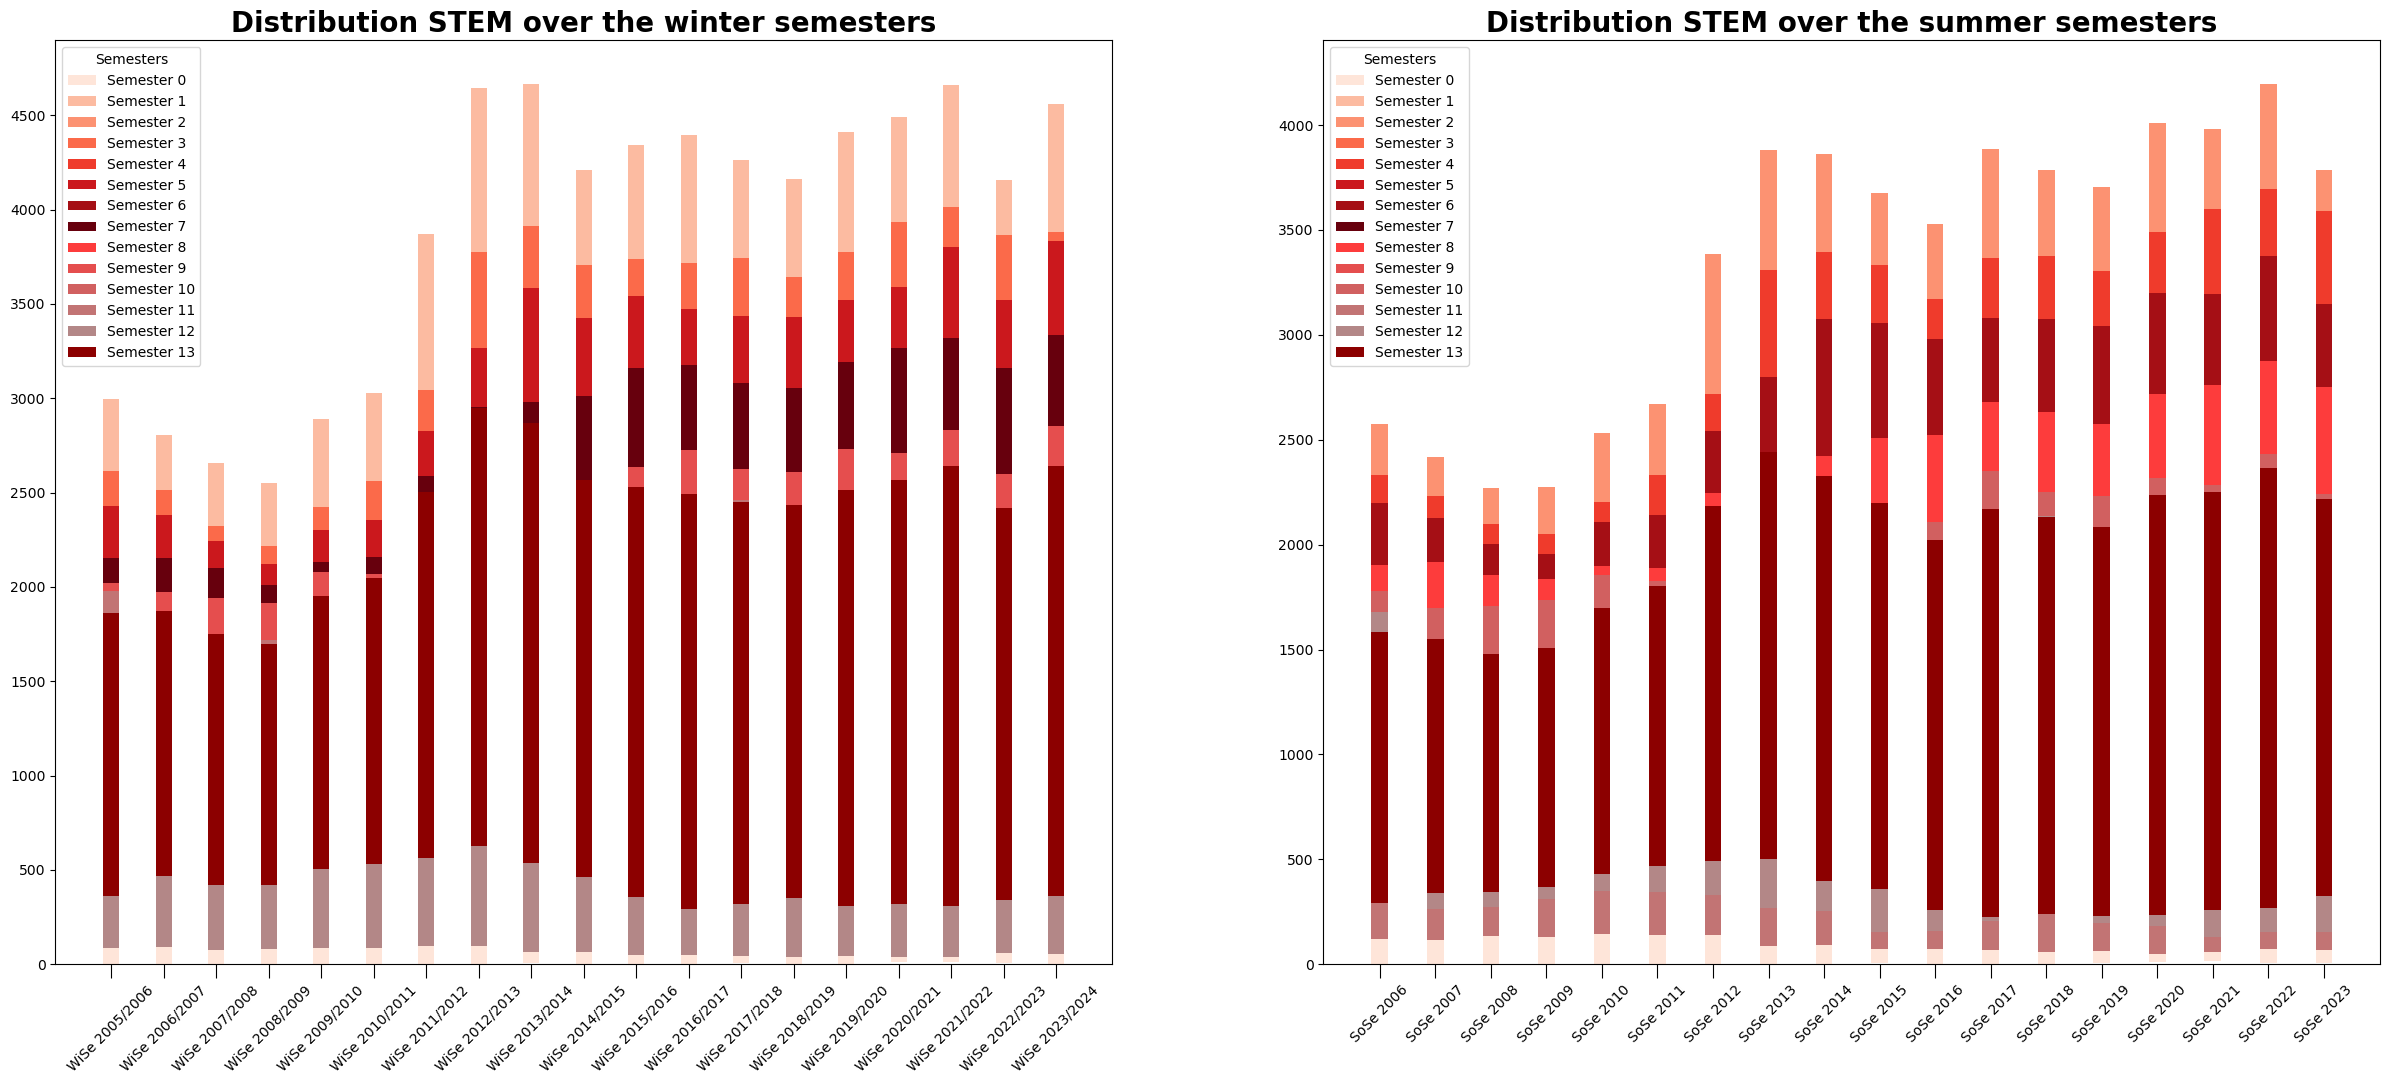

In [41]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(30,12));
ax[0].set_title("Distribution STEM over the winter semesters", size=20, fontweight='bold')
ax[0].tick_params(axis='x',rotation=45, right='right', size=10)
ax[0].set_yticks(np.arange(0,5000,500));
ax[1].set_title("Distribution STEM over the summer semesters", size=20,fontweight='bold')
ax[1].tick_params(axis='x',rotation=45, right='right', size=10)
ax[1].set_yticks(np.arange(0,5000,500));


def add_trend_line():
    pass

createBarPlot(winterSemester, STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR, ax[0])
createBarPlot(summerSemester, STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR, ax[1])
legendWithoutDuplicateLabels(ax[0])
legendWithoutDuplicateLabels(ax[1])
fig.savefig(os.path.join(PLOT_DIR, "stacked_bar_chart_stem_subjects.jpg"))

Wie man sehen kann 

In [152]:
TotalStudents = [[STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR[year][semester] for semester in range(len(STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR[year]))] for year in years]
TotalStudents

/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_18820/3195463436.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TotalStudents = [[STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR[year][semester] for semester in range(len(STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR[year]))] for year in years]


[[0, 1498, 219, 1115, 211, 932, 290, 654, 192, 521, 143, 479, 84, 363],
 [0, 303, 1288, 182, 1044, 209, 912, 201, 614, 176, 489, 120, 389, 294],
 [0, 1402, 245, 1113, 190, 979, 261, 752, 219, 569, 160, 420, 94, 470],
 [0, 297, 1209, 193, 1025, 191, 918, 215, 706, 205, 488, 116, 262, 342],
 [0, 1328, 252, 995, 220, 915, 247, 770, 228, 615, 178, 383, 74, 420],
 [0, 221, 1136, 211, 962, 220, 868, 217, 720, 197, 570, 133, 274, 343],
 [0, 1276, 205, 941, 240, 847, 244, 733, 234, 639, 161, 443, 81, 422],
 [0, 221, 1138, 185, 913, 233, 817, 211, 697, 193, 596, 129, 313, 370],
 [0, 1445, 209, 979, 195, 857, 272, 688, 213, 633, 176, 505, 86, 506],
 [0, 275, 1267, 187, 938, 186, 841, 254, 633, 192, 586, 146, 350, 430],
 [0, 1514, 247, 1045, 193, 843, 205, 646, 240, 556, 163, 488, 88, 534],
 [3, 349, 1335, 229, 998, 190, 804, 172, 553, 193, 490, 141, 346, 467],
 [0, 1936, 277, 1106, 222, 891, 199, 650, 163, 481, 158, 415, 97, 566],
 [2, 416, 1693, 269, 1025, 218, 849, 186, 553, 145, 428, 138, 330

In [171]:
STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR

                Subject
WiSe 2005/2006  0             0
                1          1498
                2           219
                3          1115
                4           211
                           ... 
WiSe 2023/2024  9           573
                10          123
                11          237
                12           54
                >12         360
Length: 518, dtype: int64

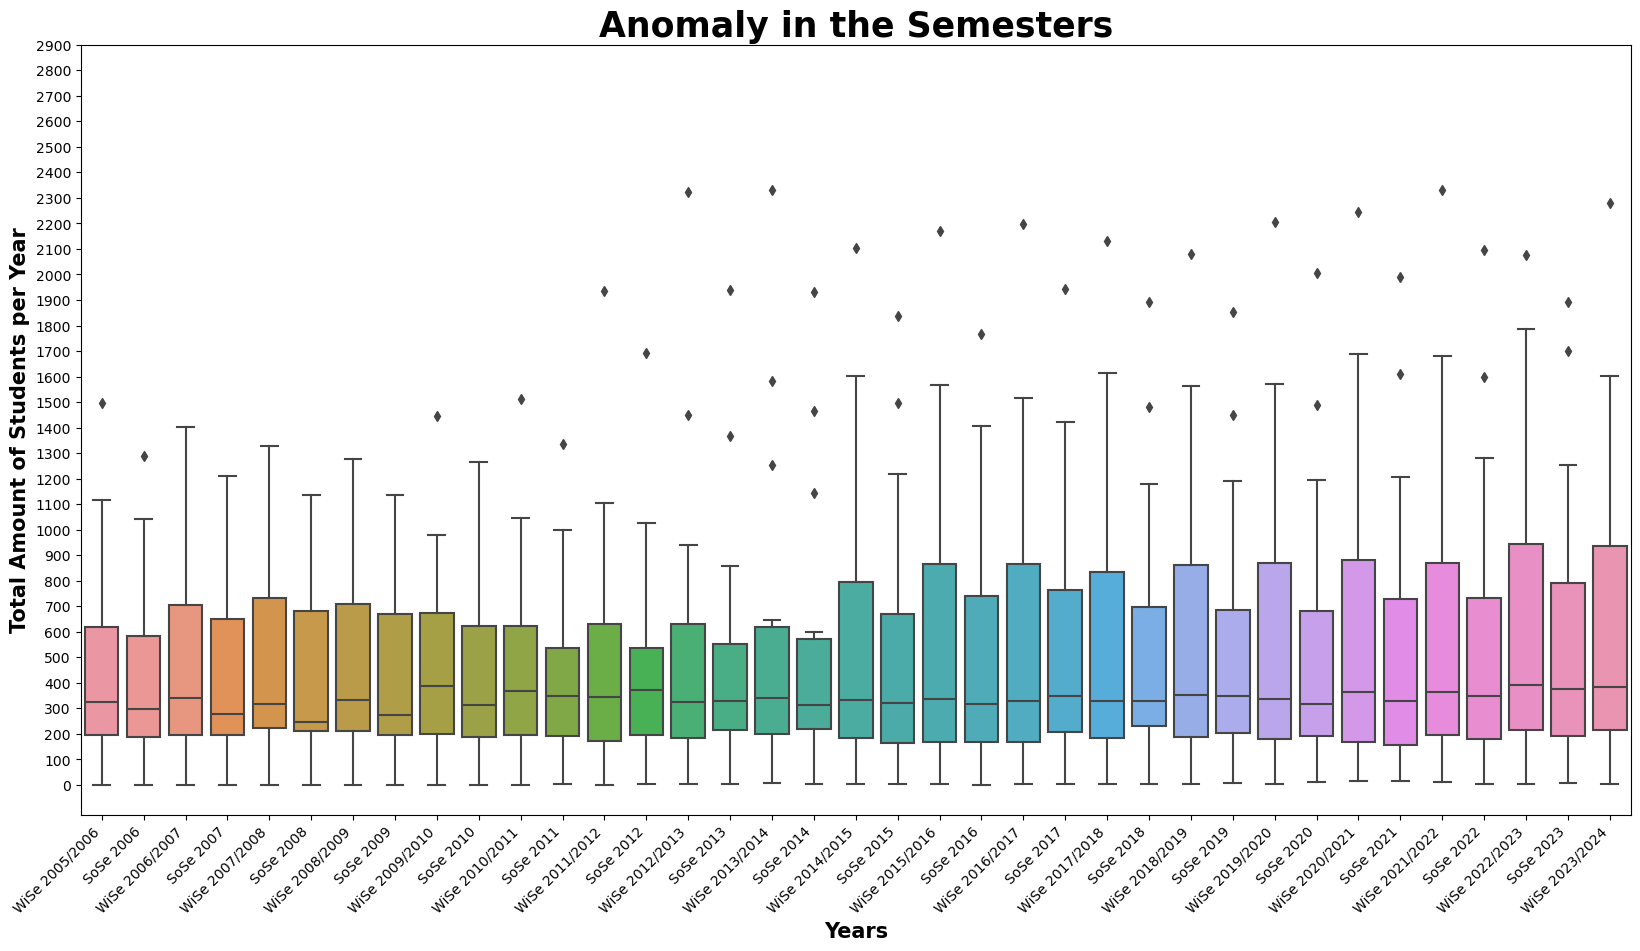

In [167]:
fig, ax = plt.subplots(figsize=(20,10))

STEM_SUBJECTS = STEM_DATA_FRAME.index.get_level_values(1)
STEM_DEGREE = STEM_DATA_FRAME.index.get_level_values(2)
math = STEM_DATA_FRAME[STEM_SUBJECTS.isin(['"Mathematik"']) & STEM_DEGREE.isin(['HF'])]

boxplot = sns.boxplot(x=STEM_DATA_FRAME.columns.get_level_values(0),y=STEM_DATA_FRAME_PER_SEMESTER_AND_YEAR)

createPlotStyle("Anomaly in the Semesters", "Years", "Total Amount of Students per Year", 3000, 100)

plt.show()
        